##Схема проекта

Принципиальные моменты:

У страховой компании нет времени "на подумать", решение о приеме на страхование или отказе, а также о тарифе должено быть сделано непосредственно в момент обращения клиента за полисом. Соответственно, сервис должен работать в режиме реального времени и давать ответ в течение максимум нескольких секунд.
Сервис скоринга строится обычно отдельным блоком, а фронт-система взаимодействует с сервисом через API (Application programming interface).
Запрос данных из внешних источников может производиться как на уровне фронт-системы, так и на уровне сервиса.
Один из возможных вариантов - Flask.
Передача информации производится путем обмена json-файлами.
Для тестирования можно использовать Postman.

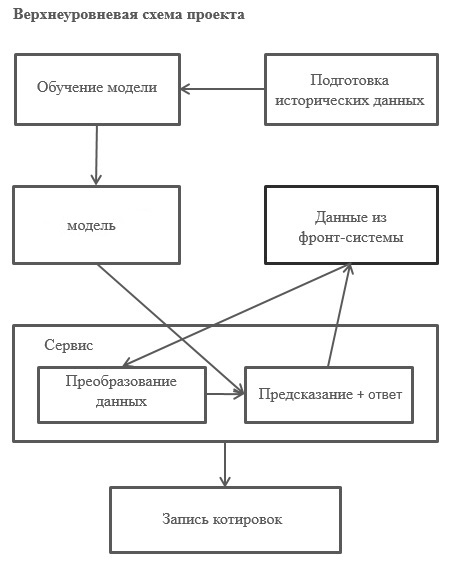

##JSON

JSON (JavaScript Object Notation) - простой текстовый формат обмена данными, он основан на подмножестве языка программирования JavaScript.

Например, строка из нашего датасета выглядела бы следующим образом:



{
"ID": 1,

"Exposure": 0.583,

"RecordBeg": "2004-06-01",

"RecordEnd": "",

"DrivAge": 55,

"Gender": "Female",

...
}

##При внедрении
###При внедрении необходимо сделать:

1. Определить формат json'а, в котором данные будут приниматься сервисом и 
отправляться обратно.
2. Определить ip-адрес и порт, на который будут поступать данные.
3. Создать во Flask необходимые роуты:
@app.route('/predict_example', method='POST')
def predict_example():
4. Перенести во Flask все функции преобразования данных,
формат данныx, приходящих от фронт-системы, может отличаться от формата исторических данных, использовавшихся при построении модели; в результате преобразований данные на вход модели должны поступить ровно в том виде, в каком была обучена модель.
5. Загрузить обученные модели.
6. Настроить логирование, запись котировок.

###Особенности:

1. Библиотека H2O использует виртуальную Java-машину:
   a. ее нужно инициализировать один раз, а не поднимать заново для каждого расчета;
   b. вручную выделить под нее отдельный порт и указать размер используемой памяти;
   c. не создавать каждый раз заново H2O-Frame, а записывать в единожды подготовленный.
2. Необходимо удостовериться, что на всех этапах сервис отрабатывает корректно; например, можно иметь заготовленный массив котировок с заранее известными ответами.
3. Необходимо провести нагрузочное тестирование и удостовериться, что сервис справляется с нагрузкой.
4. Для согласованности версий Python, Java при переносе на другие серверы имеет смысл использовать докеры.



##Flask

Тут будет сервис для обработки запросов на Flask

In [ ]:
# Подключение к Google drive

# from google.colab import drive
# drive.mount('/content/drive')

Google Colab предоставляет виртуальную машину, поэтому мы не можем получить доступ к локальному хосту, как это делаем на нашем локальном компьютере при запуске локального веб-сервера. Что мы можем сделать, так это предоставить его общедоступному URL-адресу с помощью ngrok.

https://medium.com/@kshitijvijay271199/flask-on-google-colab-f6525986797b

In [ ]:
# !pip install flask-ngrok
#!pip install flask

In [1]:
# from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
import pandas as pd

In [2]:
# Пробный запуск Flask # надо выключить!

app = Flask(__name__)
# run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/a")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [3]:
!pip install dill
import pandas as pd
# from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import roc_auc_score,roc_curve
import dill
dill._dill._reverse_typemap['ClassType'] = type

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.7 MB/s eta 0:00:00


###Создаем сервис для обработки запросов к модели

In [ ]:
# path = '/content/gdrive/MyDrive/2_ver_actual Артем Зраев. 10.2020/Lection9/'
path2='/home/nal/GB_docker_flask_example/ml_business/project_churn/'

In [ ]:
# Загружаем обученные модели
with open(path2 + 'model_RF.dill', 'rb') as in_strm:
    model = dill.load(in_strm)

In [ ]:
X_test = pd.read_csv(path2+"X_test.csv")
y_test = pd.read_csv(path2+"y_test.csv")

###Запустить сервис и не глушить его, пока работаем

In [ ]:
# Обработчики и запуск Flask
app = Flask(__name__)
# run_with_ngrok(app)  # Start ngrok when app is run

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    data = {"success": False}
  # ensure an image was properly uploaded to our endpoint
    if request.method == "POST":
#       description, company_profile, benefits = "", "", "qq"
        gender, tenure, PhoneService, TotalCharges, StreamingMovies, StreamingTV, TechSupport = "","","","","","","qq"
        request_json = request.get_json()
    if request_json["gender"]:
        gender = request_json['gender']
  
    if request_json["tenure"]:
        tenure = request_json['tenure']
      
    if request_json["TotalCharges"]:
        TotalCharges = request_json['TotalCharges']
        
    if request_json["PhoneService"]:
        PhoneService = request_json['PhoneService']
        
    if request_json["StreamingMovies"]:
        StreamingMovies = request_json['StreamingMovies']
        
    if request_json["StreamingTV"]:
        StreamingTV = request_json['StreamingTV']
    
    if request_json["TechSupport"]:
        TechSupport = request_json['TechSupport']
        
        
        
        
#     print(description )  
    preds = model.predict_proba(pd.DataFrame({
                                            "tenure":tenure,
                                            "PhoneService":PhoneService,
                                            "TotalCharges":TotalCharges,
                                            "StreamingMovies":StreamingMovies,
                                            "StreamingTV":StreamingTV,
                                            "TechSupport":TechSupport,
                                            "gender":gender
                                           }))
    data["predictions"] = preds[:, 1]
#     data["description"] = description

# indicate that the request was a success
    data["success"] = True

# return the data dictionary as a JSON response
    return jsonify(data)
 

if __name__ == '__main__':
    app.run()